import module

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchsummary import summary

準備訓練資料


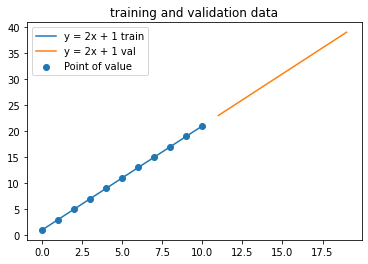

In [13]:
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

x_values_val = [i for i in range(11, 20, 1)]
x_val = np.array(x_values_val, dtype=np.float32)
x_val = x_val.reshape(-1, 1)

y_values_val = [2 * i + 1 for i in x_values_val]
y_val = np.array(y_values_val, dtype=np.float32)
y_val = y_val.reshape(-1, 1)

plt.figure()
plt.title("training and validation data")
plt.plot(x_values, y_values, label="y = 2x + 1 train")
plt.plot(x_values_val, y_values_val, label="y = 2x + 1 val")
plt.scatter(x_values, y_values, label="Point of value")
plt.legend()

建立模型


In [15]:
# Build the model
class linearRegression(torch.nn.Module):
  def __init__(self, inputSize, outputSize):
    super(linearRegression, self).__init__()
    self.linear = torch.nn.Linear(inputSize, outputSize)

  def forward(self, x):
    out = self.linear(x)
    return out

inputDim = 1  # takes variable 'x'
outputDim = 1  # takes variable 'y'
learningRate = 0.01
epochs = 100

model = linearRegression(inputDim, outputDim)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)
print(model)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
train_loss = []

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


開始訓練

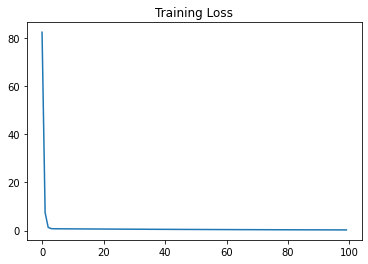

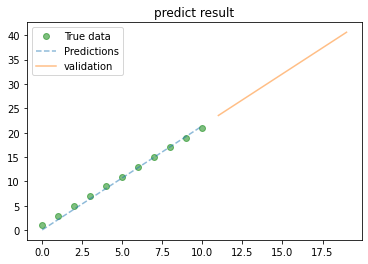

In [17]:
for epoch in range(epochs):
  inputs = torch.from_numpy(x_train).to(device)
  labels = torch.from_numpy(y_train).to(device)

  optimizer.zero_grad()

  # get output from the model, given the inputs
  outputs = model(inputs)

  loss = criterion(outputs, labels)
  train_loss.append(loss.item())
  loss.backward()

  # update parameters
  optimizer.step()
  # print('epoch {}, loss {}'.format(epoch, loss.item()))

plt.figure()
plt.title("Training Loss")
plt.plot([i for i in range(len(train_loss))], train_loss, label="train loss")

# test the training ai accuracy
with torch.no_grad():  # we don't need gradients in the testing phase
    predicted = model((torch.from_numpy(x_train).to(device))).cpu().data.numpy()
    val_predicted = model((torch.from_numpy(x_val).to(device))).cpu().data.numpy()
    # print(predicted)

plt.figure()
plt.title("predict result")
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.plot(x_values_val, val_predicted, '-', label='validation', alpha=0.5)
plt.legend(loc='best')
plt.show()
